# Edge properties
## Introduction
In this tutorial we cover understanding the properties of edges (that is, synapses and junctions).

## Preamble
The code in this section is similar to the code in sections "Introduction" and "Loading" from the previous tutorial, but applied to edges.

In [1]:
import bluepysnap
import matplotlib.pyplot as plt
%matplotlib inline

# load the circuit and store the node population
circuit_path = "/gpfs/bbp.cscs.ch/project/proj30/hippocampus/single_column/sonata/struct_circuit_config.json"
circuit = bluepysnap.Circuit(circuit_path)
edge_population = circuit.edges["All"]
edge_population.property_names

{'afferent_center_x',
 'afferent_center_y',
 'afferent_center_z',
 'conductance',
 'decay_time',
 'delay',
 'depression_time',
 'efferent_surface_x',
 'efferent_surface_y',
 'efferent_surface_z',
 'facilitation_time',
 'morpho_offset_segment_post',
 'morpho_offset_segment_pre',
 'morpho_section_fraction_post',
 'morpho_section_fraction_pre',
 'morpho_section_id_post',
 'morpho_section_id_pre',
 'morpho_section_type_post',
 'morpho_segment_id_post',
 'morpho_segment_id_pre',
 'morpho_spine_length',
 'morpho_type_id_pre',
 'n_rrp_vesicles',
 'syn_type_id',
 'u_syn'}

## Properties and methods
Edge populations provide information about the collection of edges, and what information is available for each of the edges themselves.

For example, the edge population `name` and `size` (that is, the number of nodes it contains) can be retrieved:

In [2]:
print("Name:", edge_population.name)
print("Population size:", edge_population.size)

Name: All
Population size: 14738826


We can query the edges between sections of nodes with specific m-types, and retrieve their properties:

In [3]:
pre = {'mtype': 'SP_Ivy'}
post = {'mtype': 'SR_SCA'}

# TODO: node_ids would be better than section_ids
synapses = edge_population.pathway_edges(
    source=pre, target=post,
    properties=['morpho_section_id_pre', 'morpho_section_id_post', 'u_syn']
)

This allows us to then visualize the distribution of the number of connections:

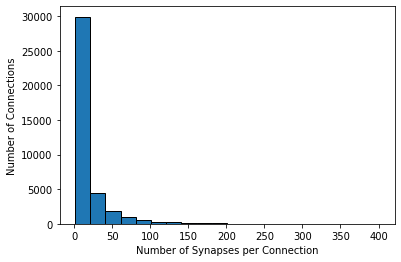

In [4]:
df = synapses.groupby(['morpho_section_id_pre', 'morpho_section_id_post']).size()
ax = df.hist(bins=20, edgecolor='black', grid=False)
ax.set_xlabel('Number of Synapses per Connection')
ax.set_ylabel('Number of Connections');

Or, alternatively, the distribution of other properties of the edges:

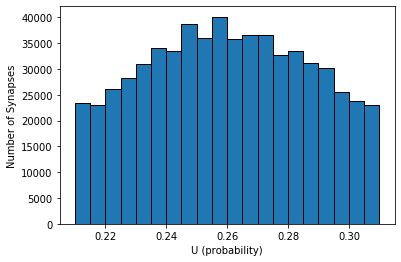

In [5]:
df = synapses.u_syn
ax = df.hist(bins=20, edgecolor='black', grid=False)
ax.set_xlabel('U (probability)')
ax.set_ylabel('Number of Synapses');